In [46]:
from numpy import *
import operator
import matplotlib.pyplot as plt

**kNN algorithm implementation**

In [339]:
"""
vec : input with unknown category
df : given dataset
k : kNN param
"""
def kNN(vec, df, label, k):
    dataSetSize = df.shape[0]
    #tile function broadcast num to designated size, i.e.(dataSetSize, 1)
    #This calculate the pure difference between each training point and predicting point
    diffMat = tile(vec, (dataSetSize,1)) - group
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
#     print(distances)
    #Ranking of each distance
    rank = distances.argsort()
    label_appearance = {'A':0,'B':0}
    selected = []
    for i in range(len(rank)):
        if rank[i] < k:
            class_label = label[i]
            curr_appearance = label_appearance[class_label]
            label_appearance[class_label] = curr_appearance + 1
            selected_pair = [(lambda x : round(x,2)) (x) for x in list(df[i])]
            selected.append(selected_pair)
    sortedClassCount = sorted(label_appearance.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0], selected 

**Example**

In [367]:
#Generate dataset with custom number of points
def createDataSet(num_of_points):
    candidate = ['A','B']
    entries = []
    labels = []
    for i in range(num_of_points):
        entry = random.rand(1,2)
        entries.append(entry[0])
        labels.append(candidate[random.randint(2)])
    group = array(entries)
    return group, labels

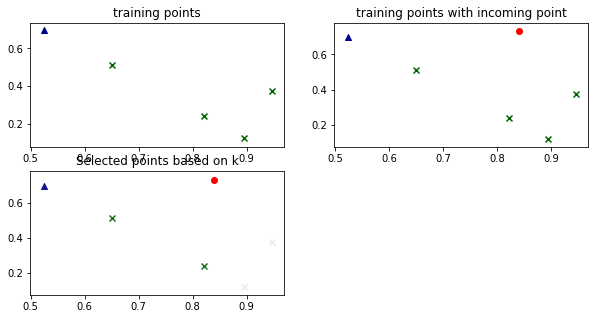

kNN predicts that [[0.26257636 0.87691379]] belongs to B
-----------------------------------------------------------------


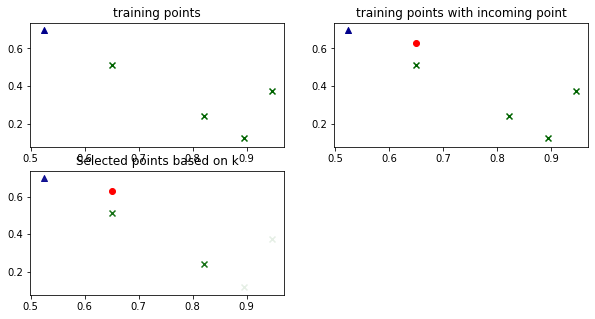

kNN predicts that [[0.26257636 0.87691379]] belongs to B
-----------------------------------------------------------------


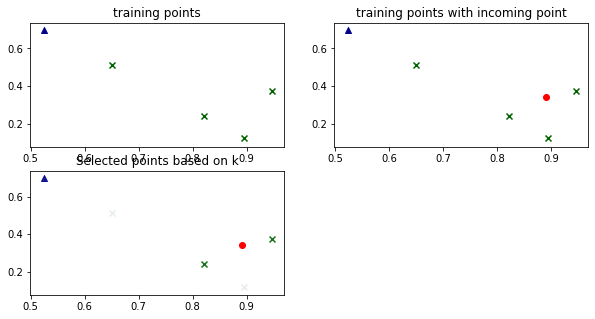

kNN predicts that [[0.26257636 0.87691379]] belongs to B
-----------------------------------------------------------------


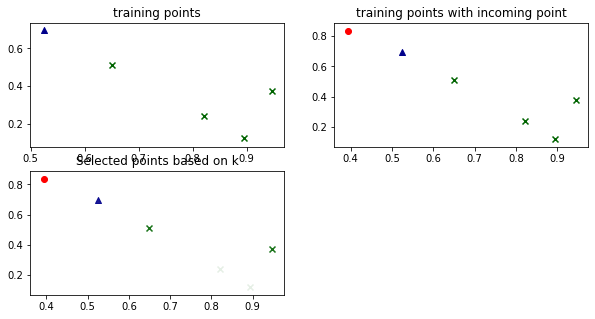

kNN predicts that [[0.26257636 0.87691379]] belongs to B
-----------------------------------------------------------------


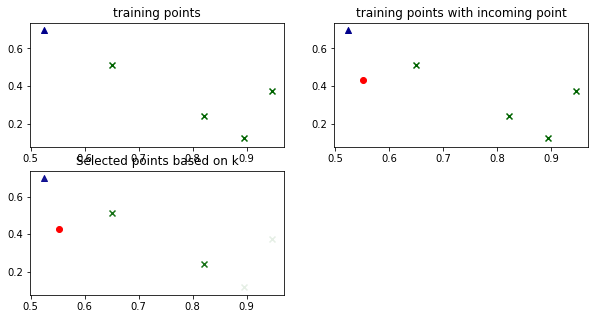

kNN predicts that [[0.26257636 0.87691379]] belongs to B
-----------------------------------------------------------------


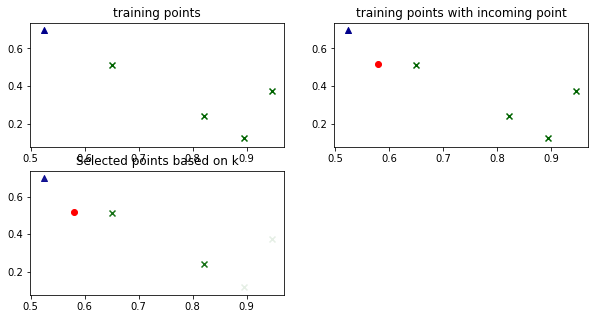

kNN predicts that [[0.26257636 0.87691379]] belongs to B
-----------------------------------------------------------------


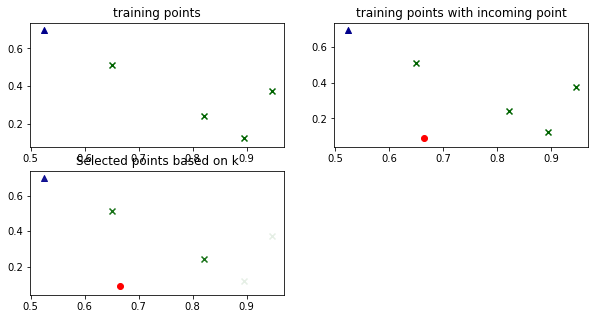

kNN predicts that [[0.26257636 0.87691379]] belongs to B
-----------------------------------------------------------------


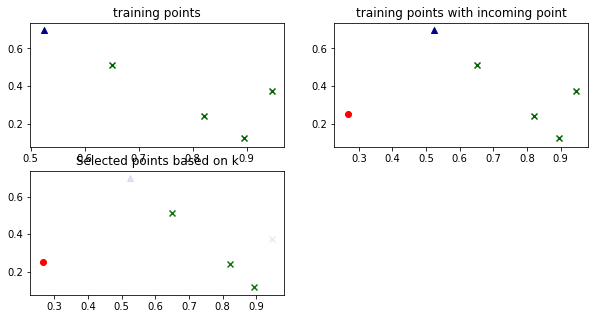

kNN predicts that [[0.26257636 0.87691379]] belongs to B
-----------------------------------------------------------------


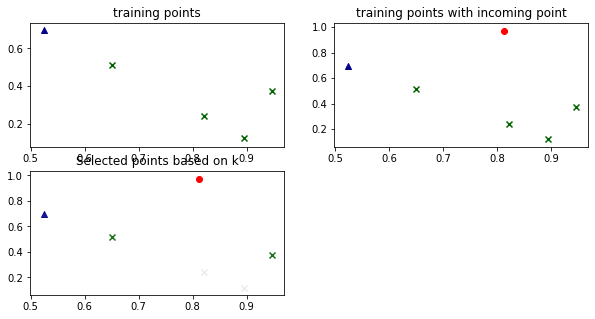

kNN predicts that [[0.26257636 0.87691379]] belongs to B
-----------------------------------------------------------------


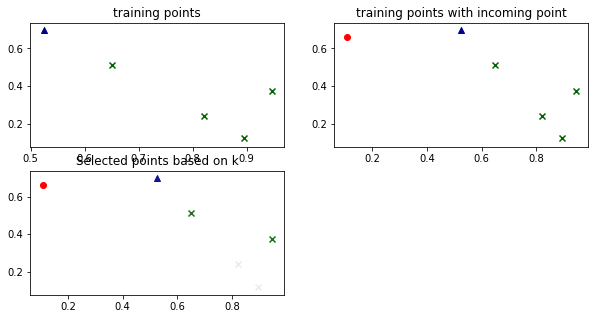

kNN predicts that [[0.26257636 0.87691379]] belongs to B
-----------------------------------------------------------------


In [366]:
#Get data
group, labels = createDataSet(5)
#Using kNN to make prediction
for i in range(10):
    vec = random.rand(1,2)
    prediction, selected= kNN(vec, group, labels, 3)
    plot(group, labels, vec, selected)
    print('kNN predicts that', num, 'belongs to', prediction)
    print('-----------------------------------------------------------------')

**Visualization**

In [365]:
def plot(group, labels, vec, selected):
    fig = plt.figure(figsize=(10,5))
    fig.add_axes()
    ax = fig.add_subplot(221)
    for i in range(len(labels)):
        if labels[i] == 'A':
            COLOR = 'darkblue'
            ax.scatter(group[i,0],group[i,1],marker='^',color=COLOR)
        else:
            COLOR = 'darkgreen'
            ax.scatter(group[i,0],group[i,1],marker='x',color=COLOR)
    plt.title('training points')

    ax1 = fig.add_subplot(222)
    for i in range(len(labels)):
        if labels[i] == 'A':
            COLOR = 'darkblue'
            ax1.scatter(group[i,0],group[i,1],marker='^',color=COLOR)
        else:
            COLOR = 'darkgreen'
            ax1.scatter(group[i,0],group[i,1],marker='x',color=COLOR,label='a')
    ax1.scatter(vec[:,0],vec[:,1],marker="o",color='red')
    plt.title('training points with incoming point')

    ax2 = fig.add_subplot(223)

    for i in range(len(labels)):
        if labels[i] == 'A':
            COLOR = 'darkblue'
            ALPHA = -1;
            if [round(group[i,0],2),round(group[i,1],2)] in selected:
                ALPHA = 0.9
            else:
                ALPHA = 0.1
            ax2.scatter(group[i,0],group[i,1],marker='^',color=COLOR,alpha=ALPHA)
        else:
            COLOR = 'darkgreen'
            ALPHA = -1;
            if [round(group[i,0],2),round(group[i,1],2)] in selected:
                ALPHA = 0.9
            else:
                ALPHA = 0.1
            ax2.scatter(group[i,0],group[i,1],marker='x',color=COLOR, alpha=ALPHA)
    ax2.scatter(vec[:,0],vec[:,1],marker="o",color='red')
    plt.title('Selected points based on k')

    plt.show()

**Covariance Matrix**

In [370]:
sample = fix(random.rand(10,3)*50)
sample

array([[19., 36., 13.],
       [12., 24., 29.],
       [32.,  9., 14.],
       [33.,  6., 39.],
       [16., 44.,  4.],
       [29., 48., 42.],
       [32.,  5., 26.],
       [ 0.,  0., 11.],
       [38., 49., 36.],
       [17., 46.,  0.]])

In [374]:
dim1 = sample[:,0]
dim2 = sample[:,1]
dim3 = sample[:,2]

In [375]:
cov12 = ((dim1-mean(dim1)) * (dim2-mean(dim2))) / (size(sample) - 1)
cov23 = ((dim2-mean(dim2)) * (dim3-mean(dim3))) / (size(sample) - 1)
cov13 = ((dim1-mean(dim1)) * (dim3-mean(dim3))) / (size(sample) - 1)

In [427]:
a = mat([[-1,0.5,1],[1,-0.5,-1]])
a

matrix([[-1. ,  0.5,  1. ],
        [ 1. , -0.5, -1. ]])

In [437]:
trans = a.T
trans

matrix([[-1. ,  1. ],
        [ 0.5, -0.5],
        [ 1. , -1. ]])

In [447]:
trans * a

matrix([[ 2. , -1. , -2. ],
        [-1. ,  0.5,  1. ],
        [-2. ,  1. ,  2. ]])